In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from src.scripts.iris import dataset
import matplotlib.pyplot as plt
import xgboost as xgb
import pickle

/home/vit/qlm/.venv/lib/python3.13/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


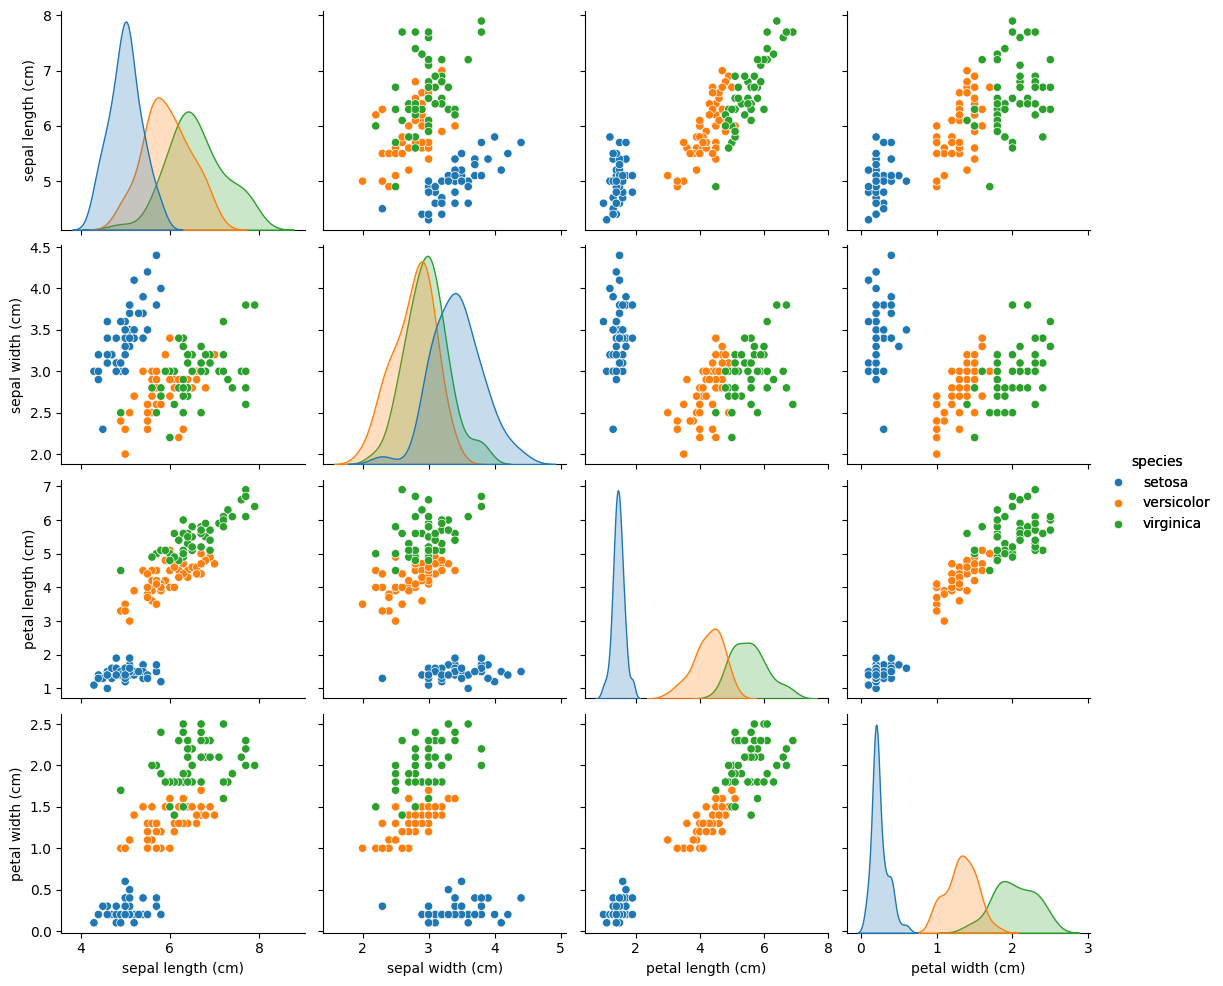

In [7]:
# use this if u want to see the data or image
if False:

    import seaborn as sns
    import pandas as pd
    import warnings

    # ignore warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)

    df = pd.DataFrame(dataset.data, columns= dataset.feature_names)
    df['species'] = dataset.target
    df['species'] = df['species'].map({i: species for i, species in enumerate(dataset.target_names)})


    sns.pairplot(df, hue='species').add_legend()

In [3]:
x = dataset.data
y = dataset.target

traine_data = train_test_split(x, y, test_size=60 /150, stratify=y, random_state=99)
x_train, x_test, y_train, y_test = traine_data

In [4]:
model = xgb.XGBClassifier()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

# print(accuracy)
print( f"{accuracy*100:.2f}%")

98.33%


[[20  0  0]
 [ 0 19  1]
 [ 0  0 20]]


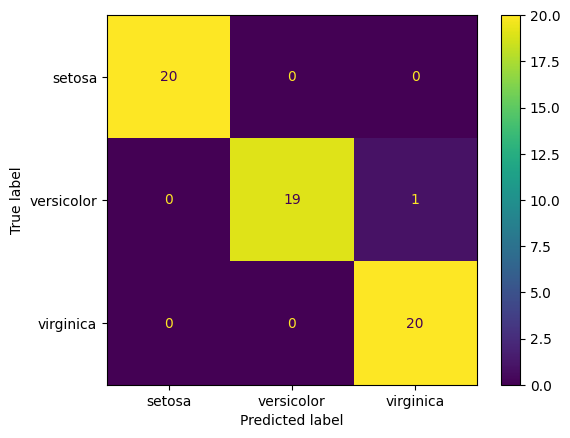

In [5]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, 
                        display_labels = dataset.target_names)

cm_display.plot()

plt.show()

In [6]:
best_accurracy = 0
worst_accuracy = 1

for seed in range(500):

    traine_data = train_test_split(x, y, test_size=60 /150, stratify=y, random_state=seed)
    x_train, x_test, y_train, y_test = traine_data

    model = xgb.XGBClassifier()
    model.fit(x_train,y_train)

    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accurracy:
        best_accurracy = accuracy
        print( f"seed: {seed}, best accurracy {accuracy*100:.2f}%")
    
    if accuracy < worst_accuracy:
        worst_accuracy = accuracy
        print( f"seed: {seed}, worst accurracy {accuracy*100:.2f}%")

    


seed: 0, best accurracy 96.67%
seed: 0, worst accurracy 96.67%
seed: 2, best accurracy 98.33%
seed: 3, worst accurracy 95.00%
seed: 6, worst accurracy 90.00%
seed: 15, worst accurracy 88.33%
seed: 25, worst accurracy 86.67%
seed: 146, worst accurracy 85.00%
seed: 272, best accurracy 100.00%
seed: 318, worst accurracy 83.33%
